## Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tflw
from tensorflow import keras
from google.colab import files
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

## Data Understanding

Pada tahap ini dilakukan untuk memahami dataset sebelum analisis.

### Data Loading


Tahap ini adalah memuat dataset. Saya menggunakan google drive agar lebih mudah.

Dataset "Anime Dataset 2023" didapatkan dari Kaggle https://www.kaggle.com/datasets/dbdmobile/myanimelist-dataset?select=users-details-2023.csv

Load data anime dataset 2023

In [12]:
anime_film = pd.read_csv('/content/drive/MyDrive/DICODING MACHINE LEARNING/Machine Learning Terapan/anime-dataset-2023.csv')
anime_film.head()

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",...,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",...,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...


Load data user details 2023

In [13]:
user = pd.read_csv('/content/drive/MyDrive/DICODING MACHINE LEARNING/Machine Learning Terapan/users-details-2023.csv')
user.head()

,Mal ID,Username,Gender,Birthday,Location,Joined,Days Watched,Mean Score,Watching,Completed,On Hold,Dropped,Plan to Watch,Total Entries,Rewatched,Episodes Watched
0,1,Xinil,Male,1985-03-04T00:00:00+00:00,California,2004-11-05T00:00:00+00:00,142.3,7.37,1.0,233.0,8.0,93.0,64.0,399.0,60.0,8458.0
1,3,Aokaado,Male,NaN,"Oslo, Norway",2004-11-11T00:00:00+00:00,68.6,7.34,23.0,137.0,99.0,44.0,40.0,343.0,15.0,4072.0
2,4,Crystal,Female,NaN,"Melbourne, Australia",2004-11-13T00:00:00+00:00,212.8,6.68,16.0,636.0,303.0,0.0,45.0,1000.0,10.0,12781.0
3,9,Arcane,NaN,NaN,NaN,2004-12-05T00:00:00+00:00,30.0,7.71,5.0,54.0,4.0,3.0,0.0,66.0,0.0,1817.0
4,18,Mad,NaN,NaN,NaN,2005-01-03T00:00:00+00:00,52.0,6.27,1.0,114.0,10.0,5.0,23.0,153.0,42.0,3038.0


Loading dataset

In [93]:
user_score = pd.read_csv('/content/drive/MyDrive/DICODING MACHINE LEARNING/Machine Learning Terapan/users-score-2023.csv')
user_score.head()

,user_id,Username,anime_id,Anime Title,rating
0,1,Xinil,21,One Piece,9
1,1,Xinil,48,.hack//Sign,7
2,1,Xinil,320,A Kite,5
3,1,Xinil,49,Aa! Megami-sama!,8
4,1,Xinil,304,Aa! Megami-sama! Movie,8


### Exploratory Data Analysis

Pada EDA ini saya akan mengecek struktur data, informasi data, mengidentifikasi adanya missing value, serta menampilkan distribusi kolom numerik.

In [14]:
anime_film.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   anime_id      24905 non-null  int64 
 1   Name          24905 non-null  object
 2   English name  24905 non-null  object
 3   Other name    24905 non-null  object
 4   Score         24905 non-null  object
 5   Genres        24905 non-null  object
 6   Synopsis      24905 non-null  object
 7   Type          24905 non-null  object
 8   Episodes      24905 non-null  object
 9   Aired         24905 non-null  object
 10  Premiered     24905 non-null  object
 11  Status        24905 non-null  object
 12  Producers     24905 non-null  object
 13  Licensors     24905 non-null  object
 14  Studios       24905 non-null  object
 15  Source        24905 non-null  object
 16  Duration      24905 non-null  object
 17  Rating        24905 non-null  object
 18  Rank          24905 non-null  object
 19  Popu

In [15]:
anime_film.shape

(24905, 24)

In [16]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731290 entries, 0 to 731289
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Mal ID            731290 non-null  int64  
 1   Username          731289 non-null  object 
 2   Gender            224383 non-null  object 
 3   Birthday          168068 non-null  object 
 4   Location          152805 non-null  object 
 5   Joined            731290 non-null  object 
 6   Days Watched      731282 non-null  float64
 7   Mean Score        731282 non-null  float64
 8   Watching          731282 non-null  float64
 9   Completed         731282 non-null  float64
 10  On Hold           731282 non-null  float64
 11  Dropped           731282 non-null  float64
 12  Plan to Watch     731282 non-null  float64
 13  Total Entries     731282 non-null  float64
 14  Rewatched         731282 non-null  float64
 15  Episodes Watched  731282 non-null  float64
dtypes: float64(10), int6

In [17]:
user.shape

(731290, 16)

In [94]:
user_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24325191 entries, 0 to 24325190
Data columns (total 5 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      int64 
 1   Username     object
 2   anime_id     int64 
 3   Anime Title  object
 4   rating       int64 
dtypes: int64(3), object(2)
memory usage: 927.9+ MB


In [95]:
user_score.shape

(24325191, 5)

In [18]:
anime_film.describe()

,anime_id,Popularity,Favorites,Members
count,24905.000000,24905.000000,24905.000000,2.490500e+04
mean,29776.709014,12265.388356,432.595222,3.710496e+04
std,17976.076290,7187.428393,4353.181647,1.568252e+05
min,1.000000,0.000000,0.000000,0.000000e+00
25%,10507.000000,6040.000000,0.000000,2.090000e+02
50%,34628.000000,12265.000000,1.000000,1.056000e+03
75%,45240.000000,18491.000000,18.000000,9.326000e+03
max,55735.000000,24723.000000,217606.000000,3.744541e+06


In [19]:
user.describe()

,Mal ID,Days Watched,Mean Score,Watching,Completed,On Hold,Dropped,Plan to Watch,Total Entries,Rewatched,Episodes Watched
count,7.312900e+05,731282.000000,731282.000000,731282.000000,731282.000000,731282.000000,731282.000000,731282.000000,731282.000000,731282.000000,7.312820e+05
mean,5.070203e+05,24.180819,3.948018,4.765714,65.953066,3.391615,4.565480,17.547893,96.230147,4.443352,1.658828e+03
std,3.640147e+05,140.105073,4.137606,20.495890,186.633286,19.296913,34.915341,90.286927,265.459220,29.693175,5.077168e+04
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,2.011085e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,4.251705e+05,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.500000e+01
75%,7.753400e+05,24.800000,8.040000,4.000000,48.000000,1.000000,1.000000,5.000000,74.000000,0.000000,1.489000e+03
max,1.291097e+06,105338.600000,255.000000,4358.000000,13226.000000,5167.000000,14341.000000,21804.000000,24817.000000,13215.000000,3.376442e+07


In [96]:
user_score.describe()

,user_id,anime_id,rating
count,2.432519e+07,2.432519e+07,2.432519e+07
mean,4.403843e+05,9.754686e+03,7.622930e+00
std,3.669469e+05,1.206196e+04,1.661510e+00
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,9.718800e+04,8.730000e+02,7.000000e+00
50%,3.879780e+05,4.726000e+03,8.000000e+00
75%,5.280430e+05,1.316100e+04,9.000000e+00
max,1.291097e+06,5.608500e+04,1.000000e+01


Cek Missing Value


In [20]:
anime_film.isnull().sum()

,0
anime_id,0
Name,0
English name,0
Other name,0
Score,0
Genres,0
Synopsis,0
Type,0
Episodes,0
Aired,0


Data film anime tidak memiliki missing value

In [21]:
user.isnull().sum()

,0
Mal ID,0
Username,1
Gender,506907
Birthday,563222
Location,578485
Joined,0
Days Watched,8
Mean Score,8
Watching,8
Completed,8


In [97]:
user_score.isnull().sum()

,0
user_id,0
Username,232
anime_id,0
Anime Title,0
rating,0


Data user memiliki missing value pada Username, Gender, Birthday, Location, Mean Score, Watching, Completed, On Hold, Plan to Watch, Total Entries, Rewatched, Episode Watched.

Hapus Duplikat Data

In [22]:
anime_film.duplicated().sum()

0

In [23]:
user.duplicated().sum()

0

In [98]:
user_score.duplicated().sum()

0

Tidak ada duplikat data

Setelah itu akan menghapus data missing value

In [24]:
user.dropna()

,Mal ID,Username,Gender,Birthday,Location,Joined,Days Watched,Mean Score,Watching,Completed,On Hold,Dropped,Plan to Watch,Total Entries,Rewatched,Episodes Watched
0,1,Xinil,Male,1985-03-04T00:00:00+00:00,California,2004-11-05T00:00:00+00:00,142.3,7.37,1.0,233.0,8.0,93.0,64.0,399.0,60.0,8458.0
5,20,vondur,Male,1988-01-25T00:00:00+00:00,"Bergen, Norway",2005-01-05T00:00:00+00:00,73.1,8.06,11.0,94.0,11.0,2.0,20.0,138.0,7.0,4374.0
11,66,Hiromi,Male,1990-02-09T00:00:00+00:00,"Calgary, AB",2005-04-01T00:00:00+00:00,70.6,7.53,34.0,148.0,13.0,6.0,10.0,211.0,50.0,4117.0
16,82,Achtor,Male,1989-06-10T00:00:00+00:00,"Paris, France",2005-04-29T00:00:00+00:00,47.0,7.17,6.0,153.0,36.0,20.0,101.0,316.0,0.0,2922.0
23,112,luffykun,Male,1983-06-09T00:00:00+00:00,"London,England",2005-06-17T00:00:00+00:00,72.6,8.77,2.0,125.0,0.0,0.0,1.0,128.0,0.0,4329.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731265,1291005,aktuos,Male,1992-07-16T00:00:00+00:00,mansoura,2012-05-06T00:00:00+00:00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
731266,1291009,blazkiller123,Male,1994-08-20T00:00:00+00:00,"Palm Desert, CA",2012-05-06T00:00:00+00:00,64.8,8.72,4.0,142.0,0.0,2.0,97.0,245.0,13.0,3831.0
731269,1291017,alexlil,Male,1996-12-07T00:00:00+00:00,"Toronto, Ontario",2012-05-06T00:00:00+00:00,204.9,8.20,15.0,554.0,23.0,17.0,51.0,660.0,27.0,12298.0
731270,1291021,Ftv-kun,Male,1991-12-11T00:00:00+00:00,"Moscow, Russia",2012-05-06T00:00:00+00:00,24.4,7.62,2.0,77.0,4.0,8.0,11.0,102.0,0.0,1405.0


In [26]:
user.shape

(731290, 16)

In [99]:
user_score.dropna()

,user_id,Username,anime_id,Anime Title,rating
0,1,Xinil,21,One Piece,9
1,1,Xinil,48,.hack//Sign,7
2,1,Xinil,320,A Kite,5
3,1,Xinil,49,Aa! Megami-sama!,8
4,1,Xinil,304,Aa! Megami-sama! Movie,8
...,...,...,...,...,...
24325186,1291087,Oblongata,10611,R-15,3
24325187,1291087,Oblongata,174,Tenjou Tenge,6
24325188,1291097,JuunanaSai,1535,Death Note,9
24325189,1291097,JuunanaSai,226,Elfen Lied,10


In [101]:
user_score.shape

(24325191, 5)

### Univariate Analysis

Univariate analysis adalah metode statistik yang digunakan untuk menganalisis satu variabel pada satu waktu. Tujuannya adalah untuk menggambarkan dan memahami karakteristik variabel tersebut, baik dari segi distribusi, central tendency (seperti mean, median, dan mode), maupun variabilitas (seperti range, variance, dan standard deviation).


pada tahap ini saya akan menampilkan visualisasi beberapa variabel agar dapat lebih memahami dataset

<ipython-input-42-eb4257c4ff48>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.head(10).index, y=genre_counts.head(10).values, palette='viridis')


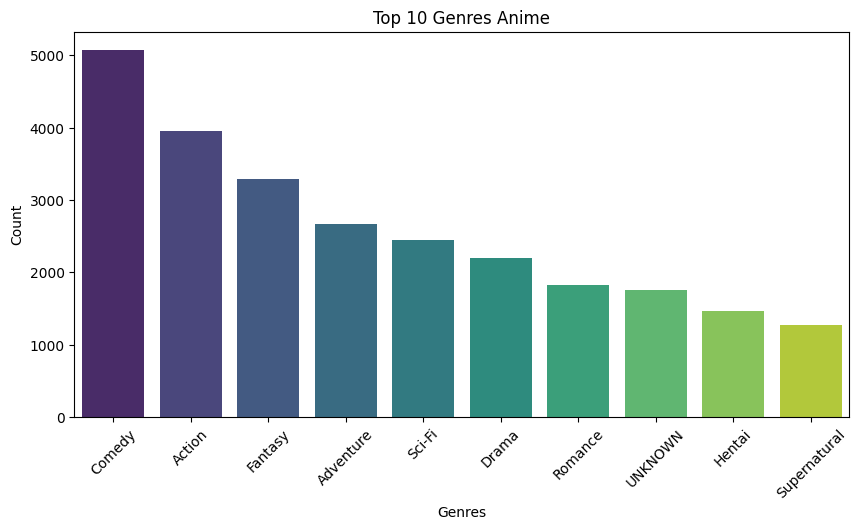

In [42]:
# Memisahkan genre dan menghitung frekuensi
all_genres = anime_film['Genres'].str.split(', ').explode()
genre_counts = all_genres.value_counts()

# Plot 10 genre terbanyak
plt.figure(figsize=(10, 5))
sns.barplot(x=genre_counts.head(10).index, y=genre_counts.head(10).values, palette='viridis')
plt.title('Top 10 Genres Anime')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Visualisasi diatas menghitung berdasarkan main genre dikarenakan value pada genre data anime terdiri dari banyak genre.

<ipython-input-44-4850344f7e2d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette='viridis')


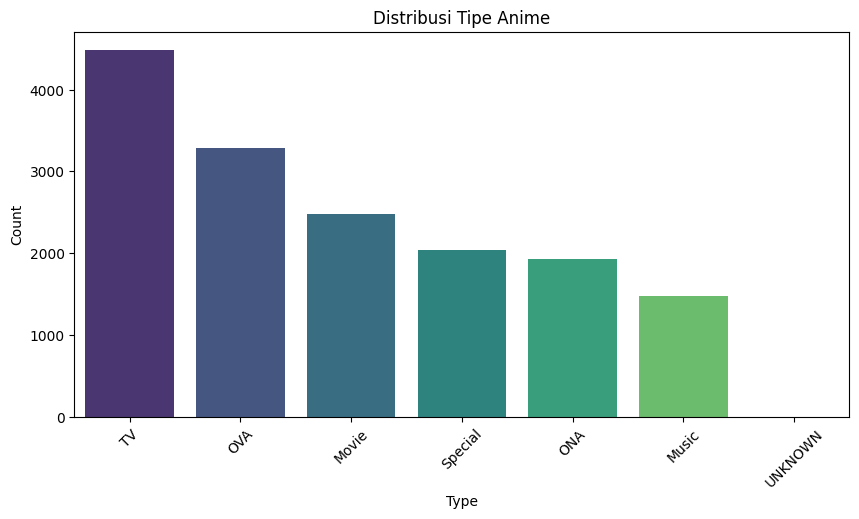

In [44]:
# Menghitung frekuensi setiap tipe anime
type_counts = anime_film['Type'].value_counts()

# Plot tipe anime
plt.figure(figsize=(10, 5))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='viridis')
plt.title('Distribusi Tipe Anime')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Visualisasi diatas menunjukkan distribusi tipe anime. Dimana paling tinggi adalah TV

Lainnya                           12293
UNKNOWN                           10526
Toei Animation                      834
Sunrise                             532
J.C.Staff                           385
Shanghai Animation Film Studio      335
dtype: int64


<ipython-input-33-20d520e9565d>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


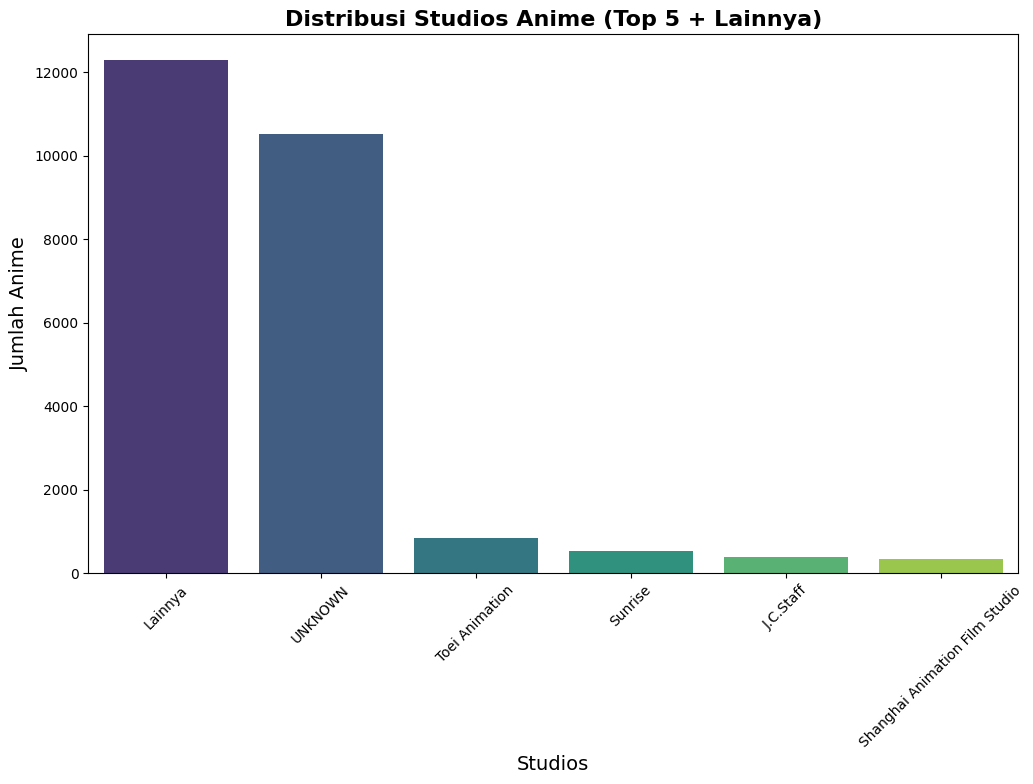

In [33]:

# Menghitung jumlah studios
studio_counts = anime_film['Studios'].value_counts()

# Mengelompokkan studios dengan jumlah terbanyak
top_studios = studio_counts.head(5)  # Mengambil 5 studio teratas
other_count = studio_counts.iloc[5:].sum()  # Menghitung total untuk studio lainnya
studio_counts_grouped = pd.concat([top_studios, pd.Series({'Lainnya': other_count})])

# Mengurutkan studio_counts_grouped dari yang tertinggi ke terendah
studio_counts_grouped = studio_counts_grouped.sort_values(ascending=False)

# Memastikan variabel studio_counts_grouped terdefinisi
print(studio_counts_grouped)

# Membuat bar chart dengan urutan dari yang tertinggi ke terendah
plt.figure(figsize=(12, 7))
sns.barplot(
    x=studio_counts_grouped.index,
    y=studio_counts_grouped.values,
    palette='viridis'
)

# Menambahkan detail pada bar chart
plt.title('Distribusi Studios Anime (Top 5 + Lainnya)', fontsize=16, fontweight='bold')
plt.xlabel('Studios', fontsize=14)
plt.ylabel('Jumlah Anime', fontsize=14)
plt.xticks(rotation=45)
plt.show()

Visualisasi diatas menunjukkan Top 5 Studio anime terbanyak

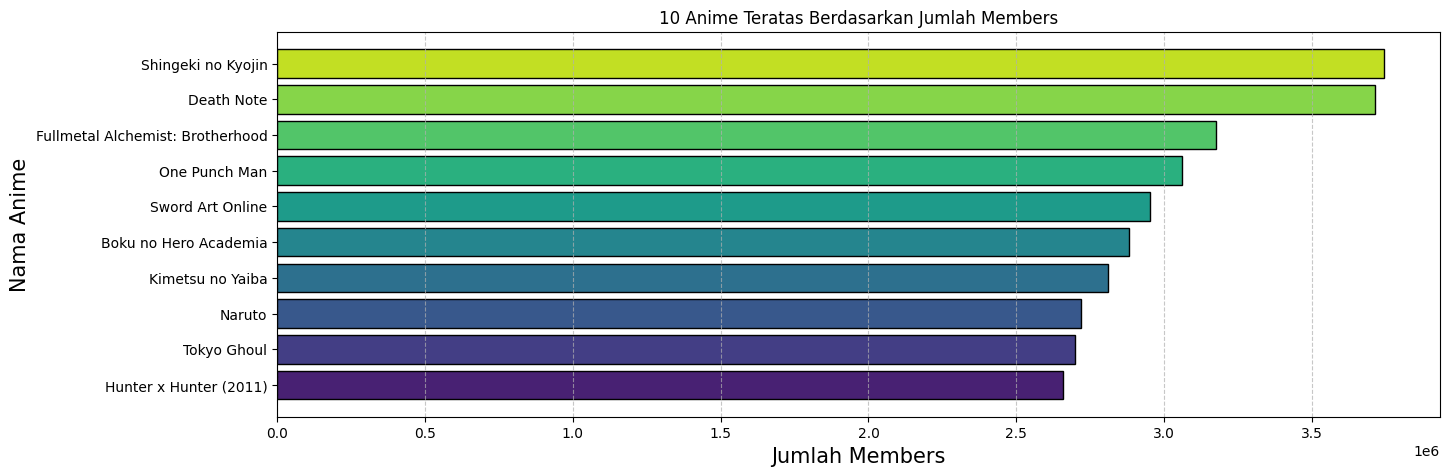

In [45]:
# Data 10 anime teratas berdasarkan jumlah members
top10_anime = anime_film.nlargest(10, 'Members')[['Name', 'Members']]

# Membalik urutan top10_anime agar yang tertinggi berada di atas
top10_anime = top10_anime.sort_values(by='Members', ascending=True)

# Menggunakan palet warna 'viridis' dari Seaborn
colors = sns.color_palette('viridis', n_colors=10)

# Plot bar horizontal
plt.figure(figsize=(15, 5))
plt.barh(top10_anime['Name'], top10_anime['Members'], color=colors, edgecolor='black')
plt.xlabel('Jumlah Members', fontsize=15)
plt.ylabel('Nama Anime', fontsize=15)
plt.title("10 Anime Teratas Berdasarkan Jumlah Members")
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()


Visualisasi diatas menunjukkan top 10 anime berdasarkan jumlah member

### Multivariate Analysis

Multivariate analysis adalah teknik statistik yang digunakan untuk menganalisis lebih dari dua variabel secara bersamaan.


pada tahap ini saya akan mengubah beberapa tipe data yang kurang cocok agar dapat mempermudah EDA Multivariate Analysis, kemudian menampilkan beberapa visualisasi hubungan antar variabel.

In [147]:
# Mengubah dat amenjadi numerik
user['Watching'] = user['Watching'].fillna(0).astype(int)
user['Completed'] = user['Completed'].fillna(0).astype(int)
user['Plan to Watch'] = user['Plan to Watch'].fillna(0).astype(int)

In [47]:
# Mengubah 'Score' dan 'Episodes' menjadi numerik
anime_film['Score'] = pd.to_numeric(anime_film['Score'], errors='coerce')
anime_film['Episodes'] = pd.to_numeric(anime_film['Episodes'], errors='coerce')

# Menghapus baris dengan NaN setelah konversi
anime_film = anime_film.dropna(subset=['Score', 'Episodes'])

<ipython-input-52-6a5315215bf6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=anime_film, x='Type', y='Score', palette='viridis')


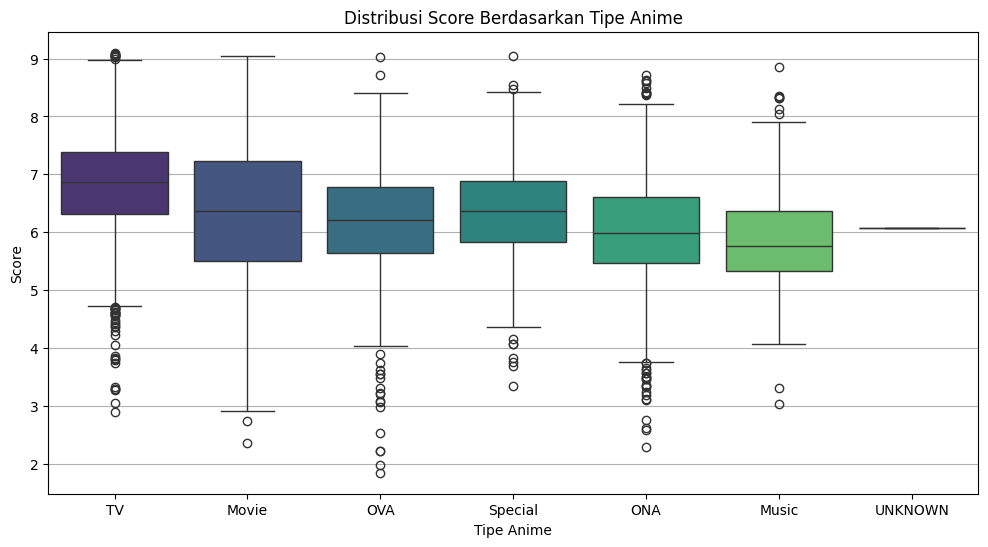

In [52]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=anime_film, x='Type', y='Score', palette='viridis')
plt.title('Distribusi Score Berdasarkan Tipe Anime')
plt.xlabel('Tipe Anime')
plt.ylabel('Score')
plt.grid(axis='y')
plt.show()

Visualisasi diatas dapat membantu melihat variasi skor untuk setiap tipe anime. Juga menampilkan outlier skor pada tiap anime.

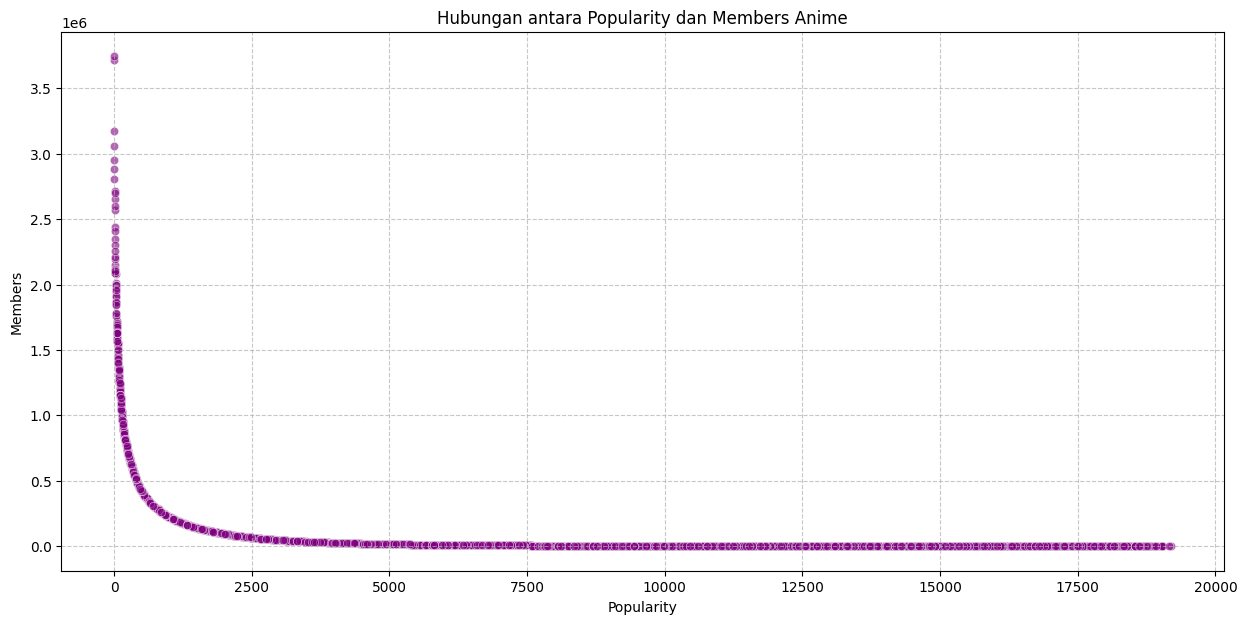

In [54]:
plt.figure(figsize=(15, 7))
sns.scatterplot(data=anime_film, x='Popularity', y='Members', alpha=0.6, color='purple')
plt.title('Hubungan antara Popularity dan Members Anime')
plt.xlabel('Popularity')
plt.ylabel('Members')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Visualisasi diatas menunjukkan hubungan antara popularitas dan jumlah member dimana semakin populer anime nya semakin banyak jumlah member.

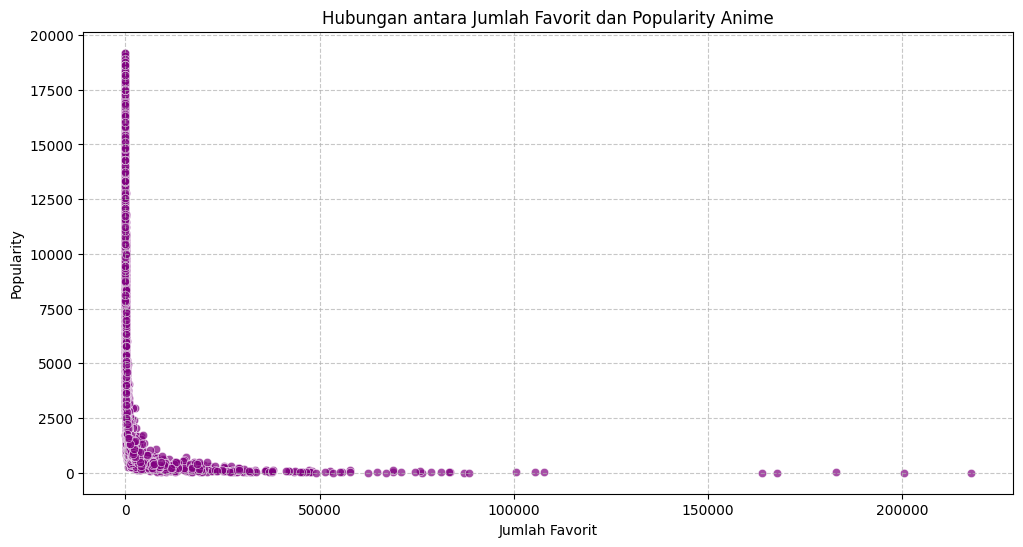

In [53]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=anime_film, x='Favorites', y='Popularity', alpha=0.7, color='purple')
plt.title('Hubungan antara Jumlah Favorit dan Popularity Anime')
plt.xlabel('Jumlah Favorit')
plt.ylabel('Popularity')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Grafik diatas menunjukkan korelasi negatif anatara jumlah favorit dan popularitas. Anime yang lebih populer (skor popularitas rendah) cenderung memiliki jumlah favorit yang lebih tinggi, meskipun tidak semua anime dengan banyak favorit berada di puncak popularitas.

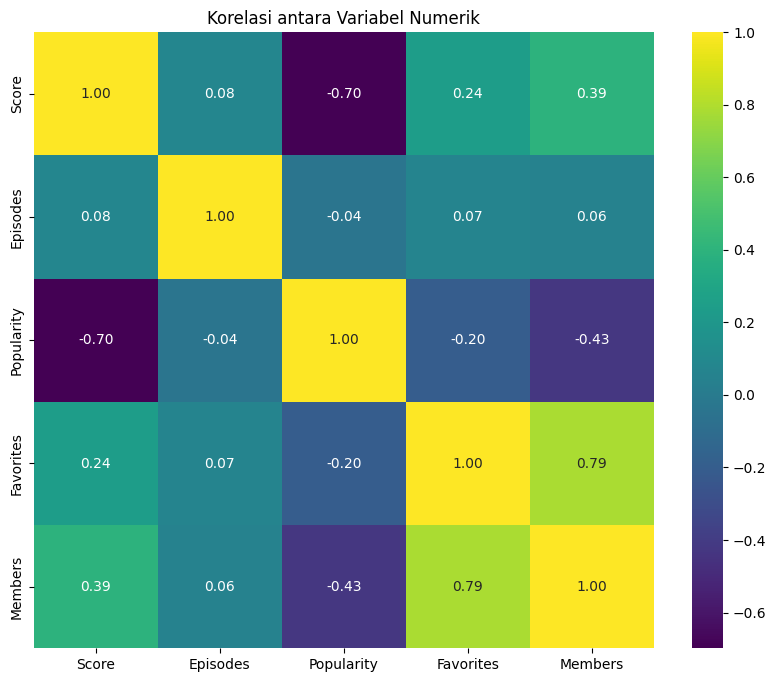

In [49]:
correlation_matrix = anime_film[['Score', 'Episodes', 'Popularity', 'Favorites', 'Members']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Korelasi antara Variabel Numerik')
plt.show()

Heatmap diatas menunjukkan kolerasi antar variabel


### Data Preprocessing

In [55]:
anime_film.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15604 entries, 0 to 24856
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   anime_id      15604 non-null  int64  
 1   Name          15604 non-null  object 
 2   English name  15604 non-null  object 
 3   Other name    15604 non-null  object 
 4   Score         15604 non-null  float64
 5   Genres        15604 non-null  object 
 6   Synopsis      15604 non-null  object 
 7   Type          15604 non-null  object 
 8   Episodes      15604 non-null  float64
 9   Aired         15604 non-null  object 
 10  Premiered     15604 non-null  object 
 11  Status        15604 non-null  object 
 12  Producers     15604 non-null  object 
 13  Licensors     15604 non-null  object 
 14  Studios       15604 non-null  object 
 15  Source        15604 non-null  object 
 16  Duration      15604 non-null  object 
 17  Rating        15604 non-null  object 
 18  Rank          15604 non-null  o

Untuk mempermudah dalam analisis maka kolom kolom yang tidak diperlukan akan dihapus


In [56]:
Anime = anime_film.drop(columns=[
    'English name', 'Other name', 'Synopsis','Episodes', 'Aired', 'Premiered',
    'Status', 'Producers', 'Licensors', 'Studios', 'Source', 'Duration', 'Rating',
    'Rank', 'Popularity', 'Favorites', 'Scored By', 'Members', 'Image URL', 'Score','Type'
    ])


In [58]:
Anime_sorted = Anime.sort_values('anime_id')

Anime_sorted

,anime_id,Name,Genres
0,1,Cowboy Bebop,"Action, Award Winning, Sci-Fi"
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Sci-Fi"
2,6,Trigun,"Action, Adventure, Sci-Fi"
3,7,Witch Hunter Robin,"Action, Drama, Mystery, Supernatural"
4,8,Bouken Ou Beet,"Adventure, Fantasy, Supernatural"
...,...,...,...
24590,55355,Li Shi Zhentan Shiwusuo: A Day in Lungmen - Ho...,"Action, Comedy, Mystery"
24635,55404,Slash,UNKNOWN
24729,55517,The IDOLM@STER Cinderella Girls: U149 Recap,UNKNOWN
24831,55647,One Piece: Dai Gekisen Tokushuu! Hangeki Doume...,"Action, Adventure, Comedy, Fantasy"


In [59]:
Anime_sorted.Genres.unique()

array(['Action, Award Winning, Sci-Fi', 'Action, Sci-Fi',
       'Action, Adventure, Sci-Fi',
       'Action, Drama, Mystery, Supernatural',
       'Adventure, Fantasy, Supernatural', 'Sports',
       'Comedy, Drama, Romance', 'Comedy, Slice of Life, Sports',
       'Action, Drama', 'Drama, Mystery, Suspense',
       'Action, Adventure, Fantasy', 'Action, Sports', 'Comedy, Romance',
       'Action, Adventure, Comedy, Sci-Fi, Ecchi',
       'Action, Drama, Sci-Fi', 'Action, Supernatural', 'Comedy, Gourmet',
       'Action, Avant Garde, Award Winning, Drama, Sci-Fi, Suspense',
       'Drama, Sci-Fi', 'Avant Garde, Drama, Sci-Fi',
       'Action, Adventure, Drama, Fantasy, Horror',
       'Action, Award Winning, Mystery, Sci-Fi, Suspense',
       'Action, Drama, Romance', 'Action, Adventure, Comedy, Romance',
       'Drama', 'Action, Adventure, Horror, Sci-Fi, Supernatural',
       'Adventure, Fantasy, Mystery', 'Comedy, Romance, Supernatural',
       'Action, Drama, Romance, Supernatural

Diatas merupakan genre-genre dari anime akan tetapi terdapat kolom genre yang berisi UNKWOWN, itu dapat mengganggu analisis maka akan dihapus.

In [60]:
Anime_sorted[Anime_sorted['Genres'] == 'UNKNOWN']

,anime_id,Name,Genres
485,518,Mahou no Princess Minky Momo,UNKNOWN
603,645,Hikaru no Go: Hokuto Hai e no Michi,UNKNOWN
894,989,Shinshaku Sengoku Eiyuu Densetsu: Sanada Juu Y...,UNKNOWN
1096,1203,Nitaboh,UNKNOWN
1115,1223,Ame to Shoujo to Watashi no Tegami,UNKNOWN
...,...,...,...
24528,55277,Shayou (Music),UNKNOWN
24549,55306,Telepath,UNKNOWN
24635,55404,Slash,UNKNOWN
24729,55517,The IDOLM@STER Cinderella Girls: U149 Recap,UNKNOWN


terdapat 1751 yang memiliki genre UNKNOWN maka selanjutnya membuat dataframe baru tanpa anime yang memiliki genre UNKNOWN

In [61]:
anime_clean = Anime_sorted[Anime_sorted['Genres'] != 'UNKNOWN']

Karena jumlah user_score yang sangat banyak maka pada tahap ini akan diambil beberapa sample saja yaitu 10000 sample dan menerapkan random_state agar data lebih teracak dengan baik.

In [102]:
rating_sample=user_score.sample(n=10000, random_state=42)


In [104]:
rating_sample.head()

,user_id,Username,anime_id,Anime Title,rating
5104691,79182,unclenekomimi,6372,Higashi no Eden Movie I: The King of Eden,9
9309709,329223,SavageGrimlock,87,Kidou Senshi Gundam: Gyakushuu no Char,7
15985036,475694,Freedom_Op666,3588,Soul Eater,9
14925220,451772,firesh,4654,Toaru Majutsu no Index,6
18396653,533993,Anui,35076,Juuni Taisen,7


## Data Preparation

Pada tahap ini dilakukan TF_IDF, Encoding pada Data User Rating, dan Data splitting pada User Rating

### TF-IDF Vectorizer Data

In [62]:
tf = TfidfVectorizer()

tf.fit(anime_clean['Genres'])

tf.get_feature_names_out()

array(['action', 'adventure', 'avant', 'award', 'boys', 'comedy', 'drama',
       'ecchi', 'erotica', 'fantasy', 'fi', 'garde', 'girls', 'gourmet',
       'hentai', 'horror', 'life', 'love', 'mystery', 'of', 'romance',
       'sci', 'slice', 'sports', 'supernatural', 'suspense', 'winning'],
      dtype=object)

In [64]:
tfidf_matrix = tf.fit_transform(anime_clean['Genres'])

tfidf_matrix_dense = tfidf_matrix.toarray()

tfidf_matrix_dense

array([[0.2632671 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.60305707],
       [0.50419479, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.43392983, 0.50921513, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.58058582, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.45638632, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.47980813, 0.56305315, 0.        , ..., 0.        , 0.        ,
        0.        ]])

### Encoding Rating

encoding fitur'user_id'

In [105]:
# Mengubah user_id menjadi list tanpa nilai yang sama
user_ids = rating_sample['user_id'].unique().tolist()
print('list user_id: ', user_ids)

# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded user_id : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke user_id
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke user_id: ', user_encoded_to_user)

list user_id:  [79182, 329223, 475694, 451772, 533993, 489671, 317854, 68115, 314866, 431564, 1160743, 443417, 459120, 1109163, 66216, 1080205, 81606, 509715, 353401, 330598, 554391, 1225439, 103461, 1101917, 1266997, 34237, 473184, 89097, 339712, 1239993, 37467, 24784, 441169, 566593, 105622, 109399, 442771, 37059, 429463, 313816, 40528, 74951, 960, 112881, 1092777, 465289, 1124367, 352109, 1083597, 1123279, 66039, 1119409, 303626, 475127, 72449, 334817, 1116913, 637945, 951047, 1095159, 1209649, 1128375, 380559, 107435, 6588, 57911, 376284, 561063, 13363, 449592, 399960, 1193315, 506485, 316056, 504335, 119595, 442705, 522961, 1128125, 10484, 424059, 4837, 1207543, 453209, 296575, 736161, 361428, 2096, 539735, 1229747, 373382, 56650, 38030, 532331, 523021, 58778, 307927, 466329, 1065293, 302842, 117357, 1193615, 9867, 64502, 1145853, 387374, 1106283, 26715, 107590, 66563, 1091063, 71451, 1104681, 510257, 398837, 374893, 390197, 301548, 344911, 438691, 1124, 1064341, 1240913, 77117, 5

In [106]:
# Menampilkan jumlah pengguna yang telah diencode
print(f'Total unique users: {len(user_ids)}')

Total unique users: 9437


encoding 'anime_id'

In [107]:
anime_ids = rating_sample['anime_id'].unique().tolist()

anime_to_anime_encoded = {x: i for i, x in enumerate(anime_ids)}

anime_encoded_to_anime = {i: x for i, x in enumerate(anime_ids)}

In [108]:
rating_sample['user'] = rating_sample['user_id'].map(user_to_user_encoded)

rating_sample['anime'] = rating_sample['anime_id'].map(anime_to_anime_encoded)

Cek jumlah user, dan jumlah anime

In [109]:
# Mendapatkan jumlah user
total_users = len(user_to_user_encoded)
print(total_users)

# Mendapatkan jumlah anime
total_anime = len(anime_encoded_to_anime)
print(total_anime)

9437
3143


In [111]:
rating_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 5104691 to 14360173
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      10000 non-null  int64 
 1   Username     10000 non-null  object
 2   anime_id     10000 non-null  int64 
 3   Anime Title  10000 non-null  object
 4   rating       10000 non-null  int64 
 5   user         10000 non-null  int64 
 6   anime        10000 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 625.0+ KB


In [112]:
rating_sample['rating'] = rating_sample['rating'].values.astype(np.float32)

Mengubah nilai rating menjadi float

## Splitting Rating

In [113]:
# Nilai minimum rating
min_rating = min(rating_sample['rating'])

# Nilai maksimal rating
max_rating = max(rating_sample['rating'])


In [114]:
rating_sample = rating_sample.sample(frac=1, random_state=42)
rating_sample

,user_id,Username,anime_id,Anime Title,rating,user,anime
8676233,316962,rinchu,12815,Shirokuma Cafe,8.0,6034,2511
12276533,390488,jackyisnot,2236,Toki wo Kakeru Shoujo,7.0,4562,273
22756124,1189963,DeidaraNT,1735,Naruto: Shippuuden,1.0,1714,636
11996396,384225,mamashi,8407,Sora no Otoshimono Forte,8.0,4618,1086
22893367,1198457,CaptainMK,14813,Yahari Ore no Seishun Love Comedy wa Machigatt...,7.0,4407,2103
...,...,...,...,...,...,...,...
5987467,95384,macholiday,7016,Senjou no Valkyria: SenVal Theater,8.0,5552,1167
7538667,294805,Keychan,4382,Suzumiya Haruhi no Yuuutsu (2009),8.0,5038,77
2649219,35825,BlackBahamut,6336,Kidou Senshi Gundam Unicorn,10.0,5226,148
18605772,542173,FenFire,10793,Guilty Crown,8.0,858,114


Tahap splitting ini mengacak data, menyiapkan fitur dan target (dengan normalisasi rating), lalu membagi data menjadi 80% untuk pelatihan dan 20% untuk validasi.

In [138]:
# Mengacak data
rating_sample = rating_sample.sample(frac=1, random_state=42)

# Membuat variabel x untuk mencocokkan data user dan anime menjadi satu value
x = rating_sample[['user', 'anime']].values

# Membuat variabel y untuk membuat rating dari hasil
y = rating_sample['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * rating_sample.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

In [139]:
print(x,y)

[[5183  453]
 [7405 1049]
 [2650  161]
 ...
 [5515  103]
 [3046 1883]
 [1911 1248]] [0.66666667 0.77777778 1.         ... 0.55555556 0.55555556 0.55555556]


## Modelling

Tahapan modelling akan dilakukan berdasarkan Content Based Learning menggunakan Cosine Similarity dan Collaborative Based learning menggunakan recomenderNet

### Model 1 Cosine Similarity

Tahap ini menghitung kemiripan kosinus antar-vektor dalam matriks TF-IDF (`tfidf_matrix`) dan menghasilkan matriks kemiripan kosinus.

In [65]:
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.52215356, 0.44938586, ..., 0.15284915, 0.1201515 ,
        0.1263177 ],
       [0.52215356, 1.        , 0.86063927, ..., 0.29272834, 0.2301076 ,
        0.24191676],
       [0.44938586, 0.86063927, 1.        , ..., 0.25193351, 0.19803964,
        0.49491824],
       ...,
       [0.15284915, 0.29272834, 0.25193351, ..., 1.        , 0.47500738,
        0.82642069],
       [0.1201515 , 0.2301076 , 0.19803964, ..., 0.47500738, 1.        ,
        0.39255592],
       [0.1263177 , 0.24191676, 0.49491824, ..., 0.82642069, 0.39255592,
        1.        ]])

In [66]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=anime_clean['Name'], columns=anime_clean['Name'])
print('Shape:', cosine_sim_df.shape)

cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (13853, 13853)


Name,Choushin Hime Dangaizer 3,Kyouiku Shidou The Animation,"Shuudengo, Capsule Hotel de, Joushi ni Binetsu Tsutawaru Yoru.",Youkai Ningen Bem: Part II,X
Name,,,,,
Yonimo Osoroshii Grimm Douwa,0.000000,0.0,0.000000,0.580577,0.000000
Eden (ONA),0.325184,0.0,0.000000,0.000000,0.149066
Wotaku ni Koi wa Muzukashii OVA,0.000000,0.0,0.678882,0.000000,0.568587
Detective Conan Magic File 5: Niigata - Tokyo Omiyage Capriccio,0.224185,0.0,0.000000,0.000000,0.000000
Watashi ga Motenai no wa Dou Kangaetemo Omaera ga Warui!,0.000000,0.0,0.000000,0.000000,0.000000
Kyoushirou to Towa no Sora Specials,0.000000,0.0,0.494834,0.000000,0.780066
Dareka no Manazashi,0.000000,0.0,0.000000,0.000000,0.228576
Free! Dive to the Future - Soushun no Build-up!,0.000000,0.0,0.000000,0.000000,0.000000
Naisho no Tsubomi,0.000000,0.0,0.678882,0.000000,0.568587


Maka didapat kesamaa anatar anime satu dnegan yang lain

Selanjutnya membuat fungsi dengan parameter nama_anime, data similarity, item (anime_name dan Genres)

Fungsi `anime_recommendations` memberikan rekomendasi anime berdasarkan kemiripan kosinus. Berikut penjelasan singkat:

1. **Validasi Input**: Memastikan `nama_anime` yang dicari ada di dalam data `similarity_data`. Jika tidak, fungsi mengembalikan pesan error.
2. **Mengambil Indeks Terdekat**: Menghitung indeks anime dengan kemiripan tertinggi terhadap `nama_anime` menggunakan data kemiripan.
3. **Daftar Terdekat**: Mengambil daftar anime terdekat (k anime paling mirip) dan menghilangkan `nama_anime` dari daftar rekomendasi.
4. **Menggabungkan Data**: Menggabungkan hasil rekomendasi dengan data `items` untuk mendapatkan informasi genre, lalu mengembalikan daftar rekomendasi (maksimal `k` anime) sebagai DataFrame.

Fungsi ini menghasilkan daftar anime yang mirip dengan `nama_anime`, lengkap dengan genre-nya.

In [67]:
def anime_recommendations(nama_anime, similarity_data=cosine_sim_df, items=anime_clean[['Name', 'Genres']], k=10):
    # Memastikan nama_anime ada dalam similarity_data
    if nama_anime not in similarity_data.columns:
        return f"{nama_anime} tidak ditemukan dalam data."

    # Mengambil indeks anime dengan similarity tertinggi
    index = similarity_data.loc[:, nama_anime].to_numpy().argpartition(range(-1, -k-1, -1))

    # Mengambil nama anime terdekat berdasarkan similarity
    closest_indices = index[-1:-(k+1):-1]
    closest = similarity_data.columns[closest_indices]

    # Menghapus nama_anime dari daftar rekomendasi
    closest = closest.drop(nama_anime, errors='ignore')

    # Mengembalikan DataFrame dengan informasi nama anime dan genre
    recommendations = pd.DataFrame(closest, columns=['Name']).merge(items, on='Name').head(k)

    return recommendations


Test rekomendasi dengan memasukkan nama anime

In [68]:
anime_clean[anime_clean.Name.eq('Cowboy Bebop')]

,anime_id,Name,Genres
0,1,Cowboy Bebop,"Action, Award Winning, Sci-Fi"


Hasil rekomendasu dimana anime ini memiliki genre yang mirip

In [69]:
anime_recommendations('Cowboy Bebop')

,Name,Genres
0,Koukaku Kidoutai: Stand Alone Complex,"Action, Award Winning, Sci-Fi"
1,SSSS.Gridman,"Action, Award Winning, Sci-Fi"
2,Mouretsu Pirates,"Award Winning, Sci-Fi"
3,Innocence,"Award Winning, Sci-Fi"
4,Tengen Toppa Gurren Lagann,"Action, Adventure, Award Winning, Sci-Fi"
5,Ao no 6-gou,"Action, Adventure, Award Winning, Sci-Fi"
6,Kidou Senkan Nadesico: The Prince of Darkness,"Action, Award Winning, Drama, Sci-Fi"
7,Shin Kidou Senki Gundam Wing: Endless Waltz,"Action, Award Winning, Drama, Sci-Fi"
8,Uchuu Senkan Yamato 2199: Hoshimeguru Hakobune,"Action, Award Winning, Drama, Sci-Fi"


### Model 2 RecommenderNet

Kode ini mendefinisikan model rekomendasi `RecommenderNet` menggunakan TensorFlow dan Keras, yang memanfaatkan embedding untuk memodelkan preferensi pengguna terhadap anime. Berikut penjelasan singkat per bagian:

1. **Inisialisasi Model**: Fungsi `__init__` mendefinisikan layer embedding untuk pengguna (`user_embedding`) dan anime (`anime_embedding`), serta bias untuk masing-masing (`user_bias` dan `anime_bias`). `embedding_size` menentukan dimensi ruang embedding, dan regularisasi `l2` diterapkan untuk mencegah overfitting.

2. **Metode `call`**: Fungsi `call` menghitung skor rekomendasi untuk pasangan pengguna-anime:
   - Mengambil embedding dan bias untuk pengguna dan anime berdasarkan `inputs`.
   - Menghitung produk titik (dot product) antara vektor embedding pengguna dan anime (`dot_user_anime`), yang mewakili kesamaan antara keduanya.
   - Menambahkan nilai bias pengguna dan anime ke hasil `dot_user_anime`.
   
3. **Aktivasi Sigmoid**: Menggunakan fungsi sigmoid pada hasil akhir untuk mengeluarkan nilai antara 0 dan 1, yang mewakili probabilitas bahwa pengguna akan menyukai anime tersebut.

Model ini ditujukan untuk sistem rekomendasi berbasis kolaboratif, yang memprediksi preferensi pengguna terhadap anime tertentu.

In [140]:
class RecommenderNet(tflw.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_anime, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_anime = num_anime
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1)
    self.anime_embedding = layers.Embedding(
        num_anime,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.anime_bias = layers.Embedding(num_anime, 1)

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    anime_vector = self.anime_embedding(inputs[:, 1]) # memanggil layer embedding 3
    anime_bias = self.anime_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_anime = tflw.tensordot(user_vector, anime_vector, 2)

    x = dot_user_anime + user_bias + anime_bias

    return tflw.nn.sigmoid(x) # activation sigmoid

In [141]:
model = RecommenderNet(total_users, total_anime, 50)

# model compile
model.compile(
    loss = tflw.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tflw.keras.metrics.RootMeanSquaredError()]
)

Training

In [142]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 32,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.6918 - root_mean_squared_error: 0.2998 - val_loss: 0.6876 - val_root_mean_squared_error: 0.2969
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.6062 - root_mean_squared_error: 0.2170 - val_loss: 0.6842 - val_root_mean_squared_error: 0.2938
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.5820 - root_mean_squared_error: 0.1875 - val_loss: 0.6844 - val_root_mean_squared_error: 0.2941
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.5740 - root_mean_squared_error: 0.1802 - val_loss: 0.6826 - val_root_mean_squared_error: 0.2925
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.5634 - root_mean_squared_error: 0.1731 - val_loss: 0.6824 - val_root_mean_squared_error: 0.2924
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.5675 - root_mean_squared_error: 0.1724 - val_loss: 0.6803 - val_root_mean_squared_error: 0.2905
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 6

Tahap selanjutnya adalah memberikan rekomendasi dari model yang telah dibuat.

- Mengambil sample secara acak
- Mendefinisikan anime_not_visited yang bermaksud anime yang belum pernah dilihat/dikunjungi user.
- Menggunakan operator bitwise

In [143]:
anime_df = anime_clean
df = rating_sample

In [144]:
# Mengambil sample user
user_id = df.user_id.sample(1).iloc[0]

# Mendapatkan anime yang sudah dikunjungi oleh user
anime_visited_by_user = df[df.user_id == user_id]['anime_id'].values

# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html
# Mengambil anime yang belum dikunjungi
anime_not_visited = anime_df[~anime_df['anime_id'].isin(anime_visited_by_user)]['anime_id']

# Mengonversi anime yang belum dikunjungi ke dalam format yang sesuai
anime_not_visited = [
    [anime_to_anime_encoded[anime_id]]
    for anime_id in set(anime_not_visited).intersection(anime_to_anime_encoded.keys())
]

# Mendapatkan user yang telah di-encode
user_encoder = user_to_user_encoded[user_id]

# Menggabungkan user dan anime yang belum dikunjungi ke dalam array
user_anime_array = np.hstack(
    ([[user_encoder]] * len(anime_not_visited), anime_not_visited)
)

# Menampilkan user_anime_array untuk memastikan hasilnya
print("User-Anime Array:", user_anime_array)


User-Anime Array: [[1172  150]
 [1172  671]
 [1172   15]
 ...
 [1172  500]
 [1172 1255]
 [1172 1185]]


In [145]:
# Mengambil sample user
user_id = df.user_id.sample(1).iloc[0]
anime_visited_by_user = df[df.user_id == user_id]

# Memastikan anime_visited_by_user adalah DataFrame
anime_visited_by_user = anime_visited_by_user.copy()

# Memprediksi rating untuk anime yang belum dikunjungi oleh pengguna
ratings = model.predict(user_anime_array).flatten()

# Mengambil indeks anime dengan rating tertinggi
top_ratings_indices = ratings.argsort()[-10:][::-1]

# Mendapatkan ID anime yang direkomendasikan berdasarkan indeks rating tertinggi
recommended_anime_ids = [
    anime_encoded_to_anime[anime_not_visited[x][0]] for x in top_ratings_indices
]

# Menampilkan rekomendasi untuk pengguna
print('Menampilkan rekomendasi untuk pengguna: {}'.format(user_id))
print('===' * 15)
print('Anime dengan rating tertinggi dari pengguna')
print('---' * 15)

# Mengambil 5 anime teratas yang sudah ditonton oleh pengguna berdasarkan rating
if not anime_visited_by_user.empty:
    top_anime_user = (
        anime_visited_by_user.sort_values(by='rating', ascending=False)
        .head(5)
        .anime_id.values
    )

    # Menampilkan detail anime yang telah ditonton
    anime_df_rows = anime_df[anime_df['anime_id'].isin(top_anime_user)]
    for row in anime_df_rows.itertuples(index=False):
        print(f"{row.Name} : {row.Genres}")
else:
    print("Pengguna belum menonton anime.")

print('---' * 15)
print('Rekomendasi 10 anime teratas')
print('---' * 15)

# Menampilkan anime yang direkomendasikan
recommended_anime = anime_df[anime_df['anime_id'].isin(recommended_anime_ids)]
for row in recommended_anime.itertuples(index=False):
    print(f"{row.Name} : {row.Genres}")


97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Menampilkan rekomendasi untuk pengguna: 482464
Anime dengan rating tertinggi dari pengguna
---------------------------------------------
Kakumeiki Valvrave : Action, Sci-Fi
---------------------------------------------
Rekomendasi 10 anime teratas
---------------------------------------------
Tennis no Ouji-sama : Sports
Slam Dunk : Sports
Tactics : Mystery, Supernatural
Major S5 : Sports
Bakuman. 2nd Season : Comedy, Drama, Romance
Berserk: Ougon Jidai-hen II - Doldrey Kouryaku : Action, Adventure, Drama, Fantasy, Horror
Kyoukaisenjou no Horizon II : Action, Fantasy, Sci-Fi
Haikyuu!! Karasuno Koukou vs. Shiratorizawa Gakuen Koukou : Sports
Violet Evergarden : Drama, Fantasy
Gintama.: Shirogane no Tamashii-hen : Action, Comedy, Sci-Fi


Diatas merupakan hasil rekomendasi untuk user

## Evaluasi Model

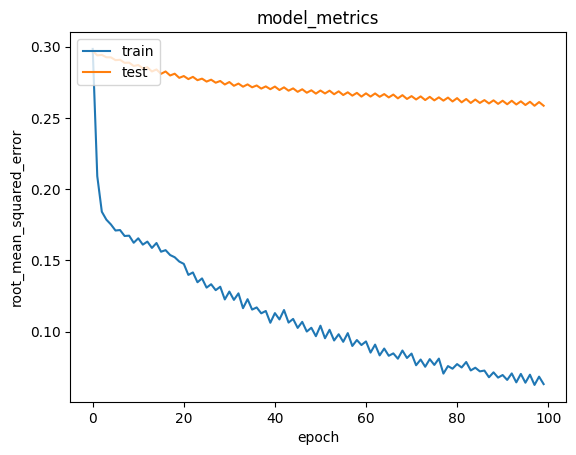

In [146]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Hasil training cukup bagus dimana hasil akhir error pada train 0.7 dan pada test 0.25

Matrix

Metrik *Precision* digunakan untuk mengevaluasi seberapa baik performa model, terutama dalam pengelompokan. *Precision* mengukur proporsi antara nilai sebenarnya (ground truth) dengan prediksi yang positif. Rumusnya adalah:

$$ Precision = \frac{TP}{TP + FP} $$

Di mana:

- TP (*True Positive*) adalah jumlah kejadian positif yang diprediksi dengan benar oleh model.
- FP (*False Positive*) adalah jumlah kejadian positif yang salah diprediksi oleh model.

Metrik ini membantu menunjukkan akurasi prediksi positif yang dihasilkan model.


Precision dihitung dengan rumus:

$$
Precision = \frac{9}{9 + 1} = \frac{9}{10} = 0.9
$$

Berdasarkan hasil yang dihasilkan oleh model Cosine Similarity sebelumnya, tingkat presisi yang dihitung adalah 9/10 untuk rekomendasi Top-10. Ini menunjukkan bahwa sistem mampu memberikan rekomendasi yang sangat sesuai dengan genre anime yang diinginkan, meskipun ada sedikit perbedaan dari rekomendasi yang ideal